In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset.

df1 = pd.read_csv('ToyotaCorolla - MLR.csv')
df1.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [105]:
# Checking any missing values are existed.

df1.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [22]:
x = df1.drop(['Price', 'Fuel_Type'], axis=1)
y = df1['Price']

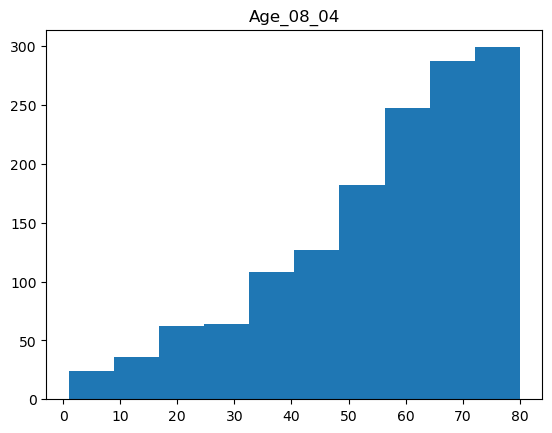

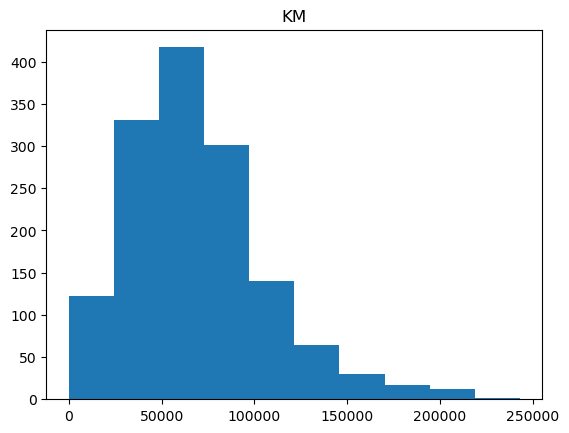

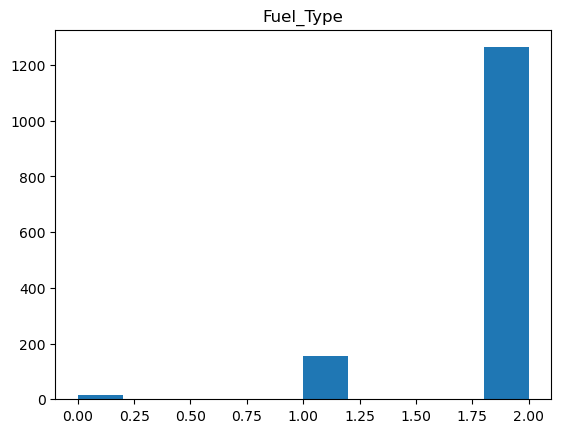

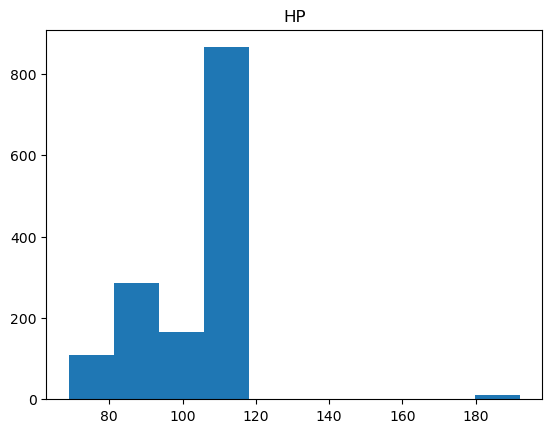

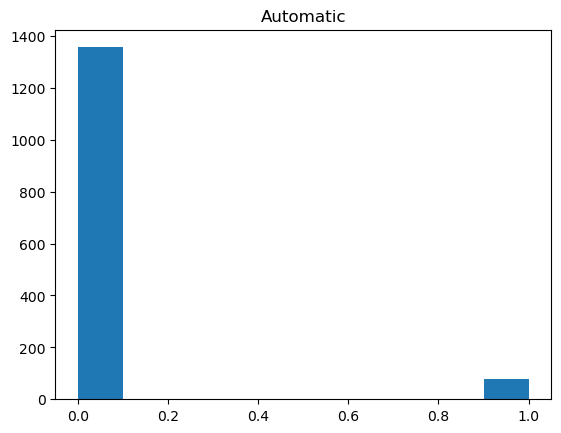

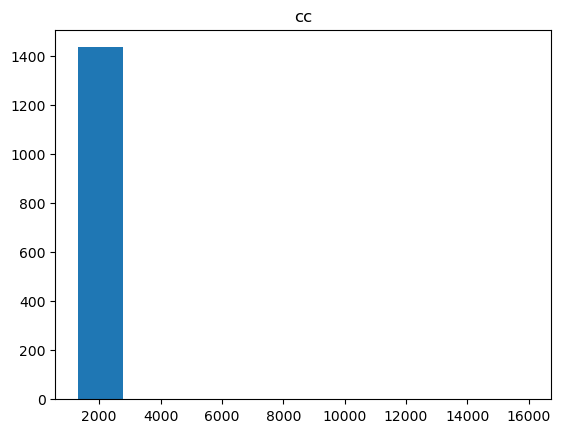

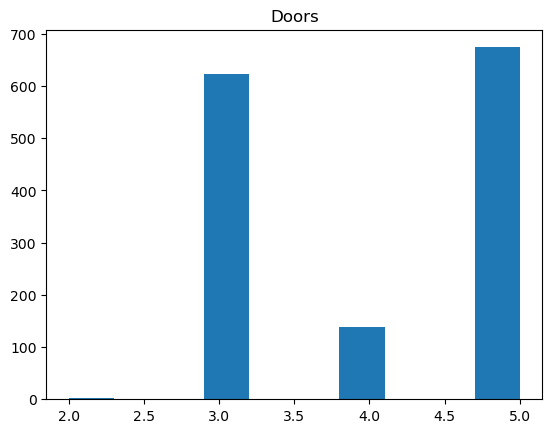

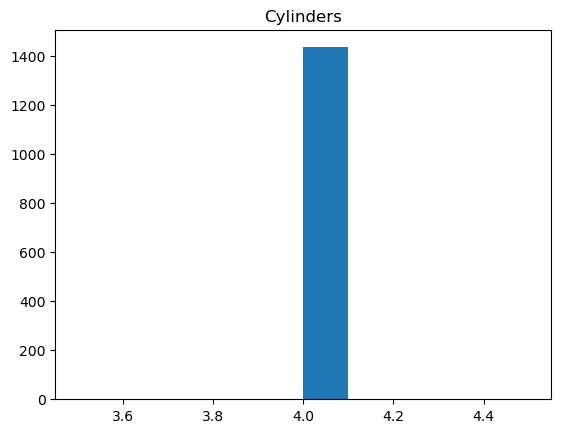

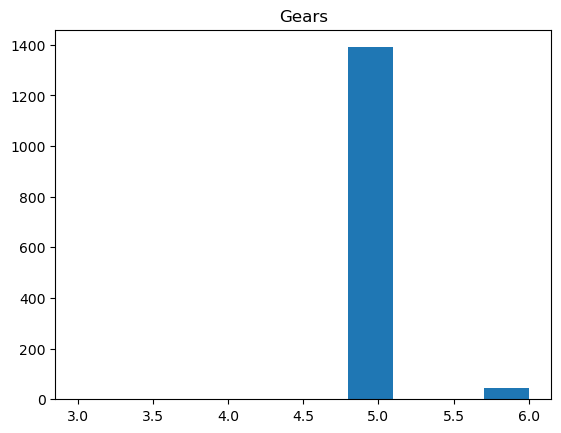

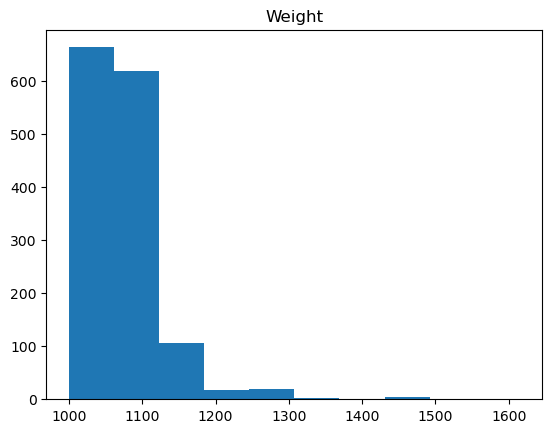

In [201]:
# Histogram for variable is normally distributed or not.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'Price']

for cols in num_cols:
    plt.hist(df1[cols])
    plt.title(cols)
    plt.show()

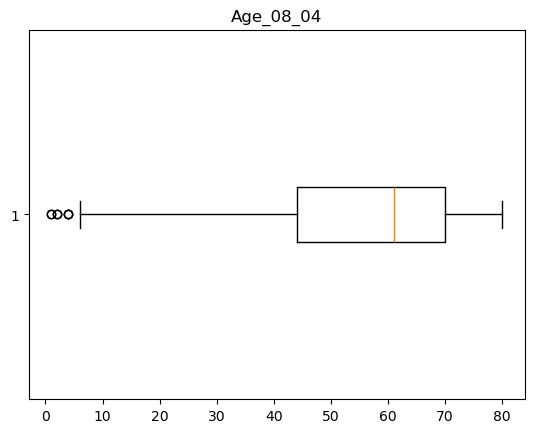

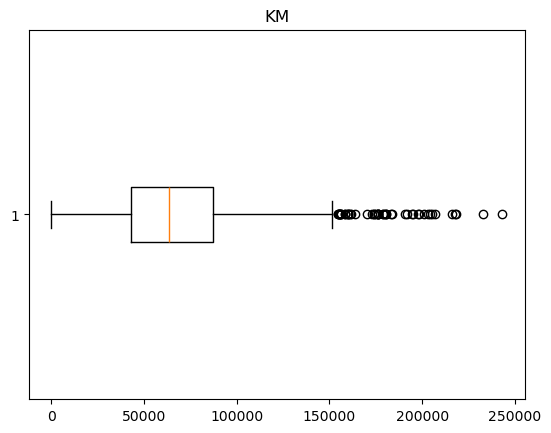

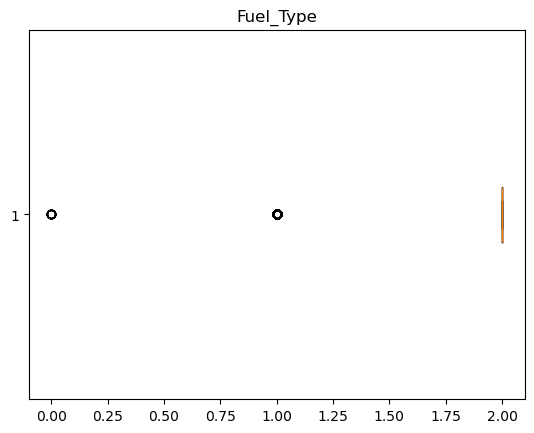

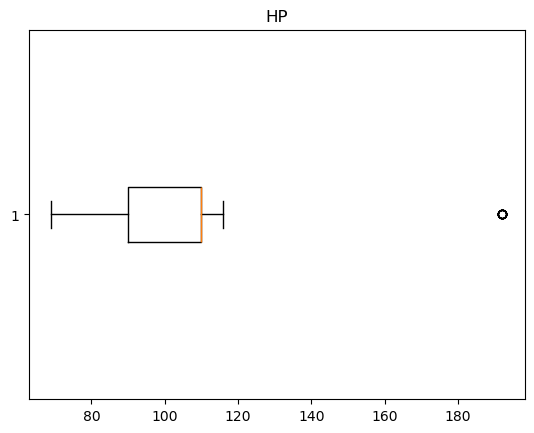

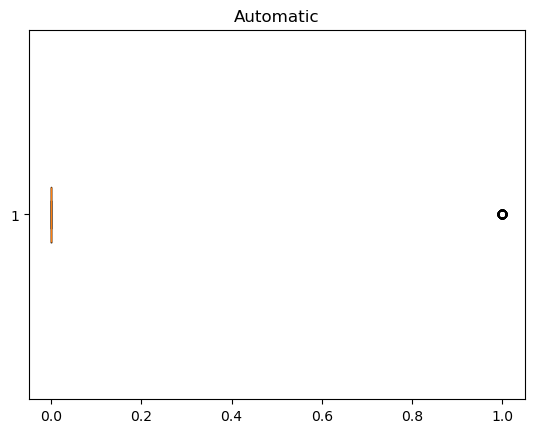

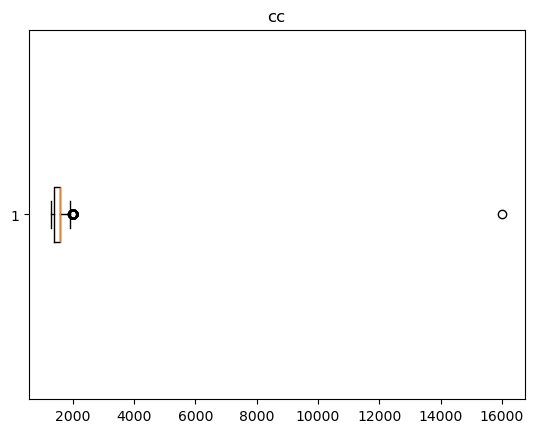

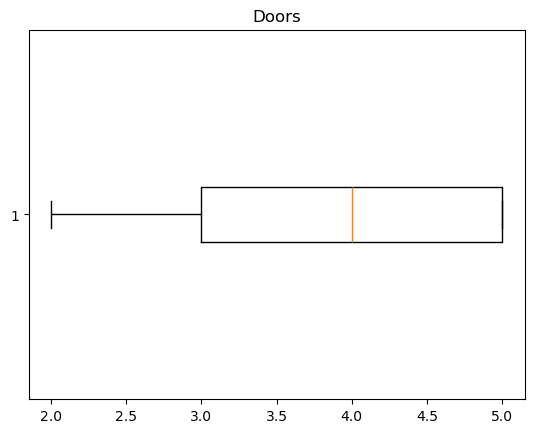

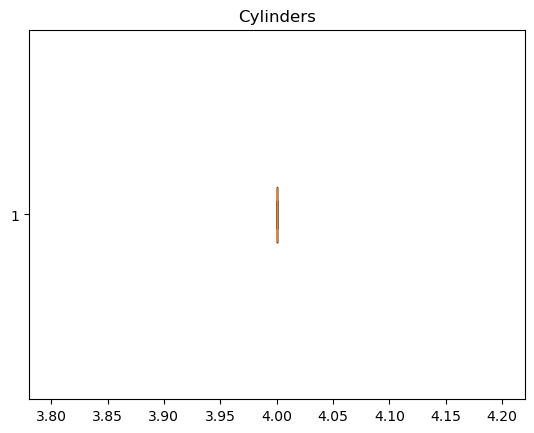

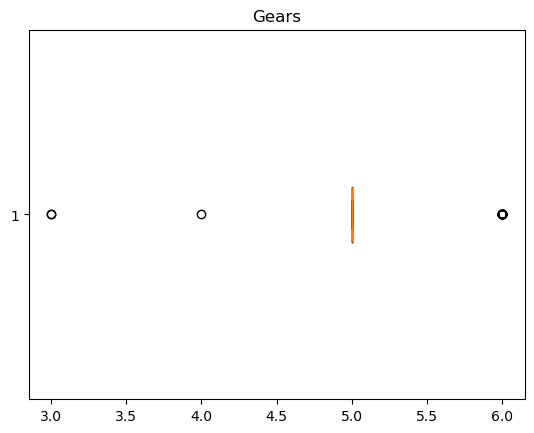

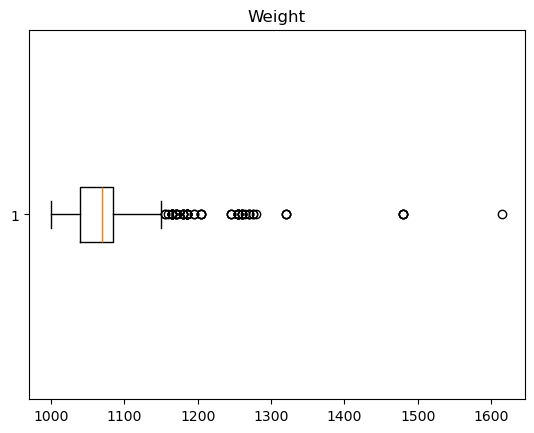

In [202]:
# Boxplot for any outliers.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'Price']

for cols in num_cols:
    plt.boxplot(df1[cols], vert = False)
    plt.title(cols)
    plt.show()

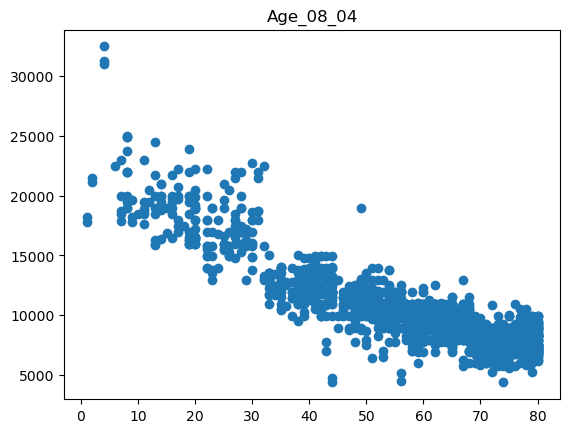

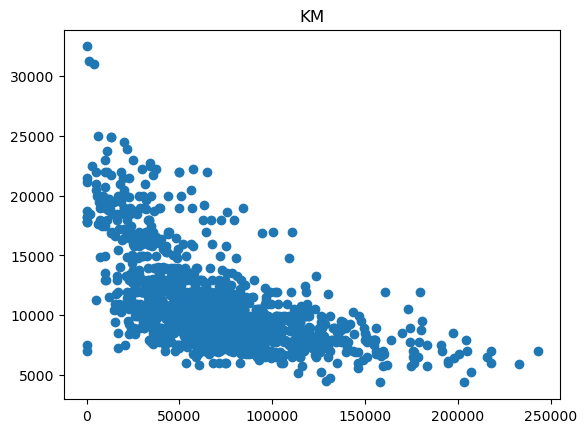

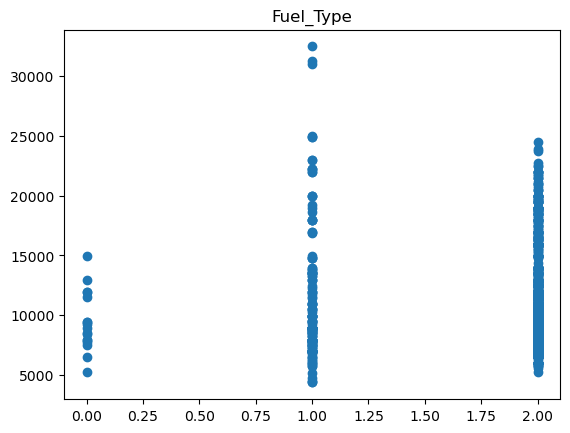

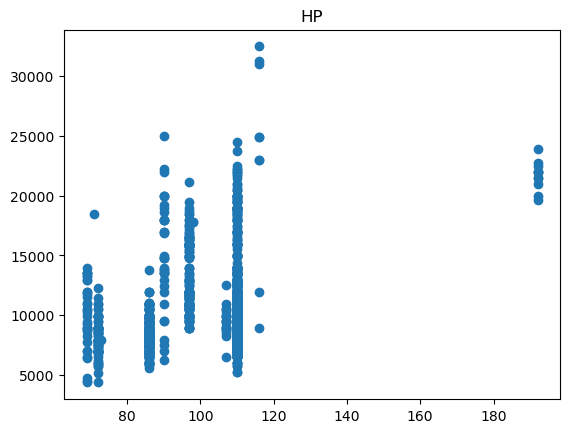

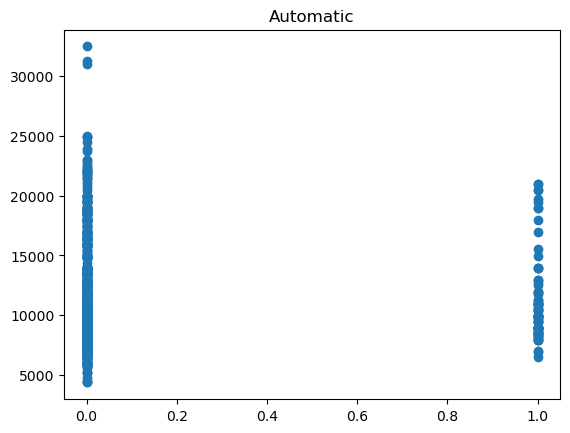

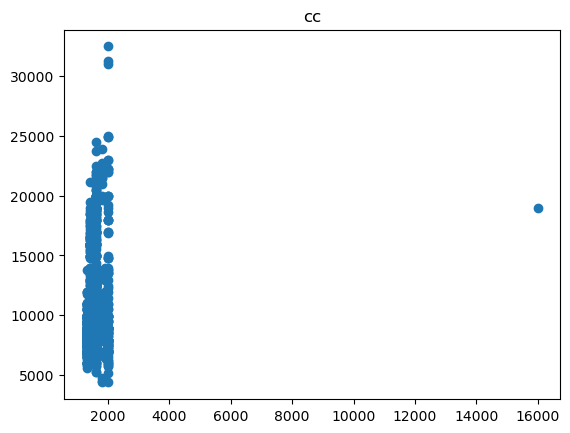

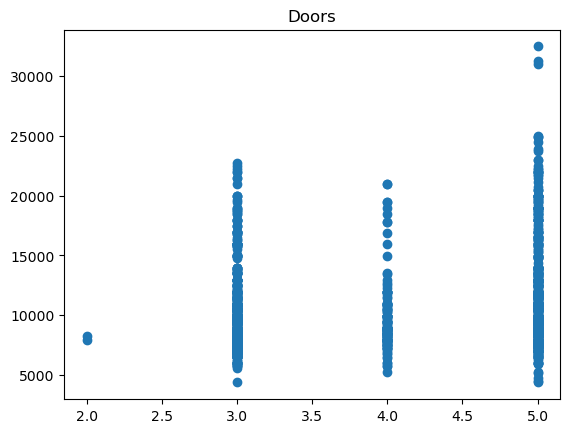

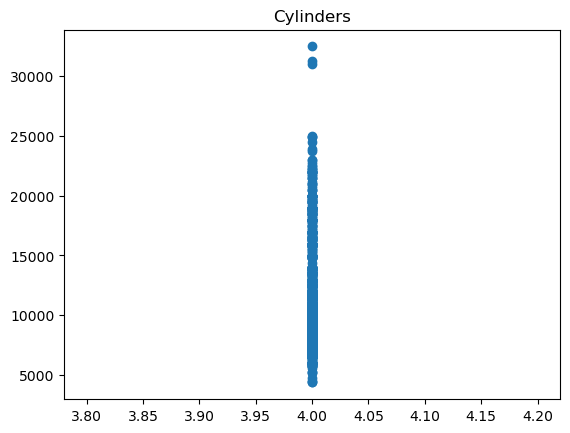

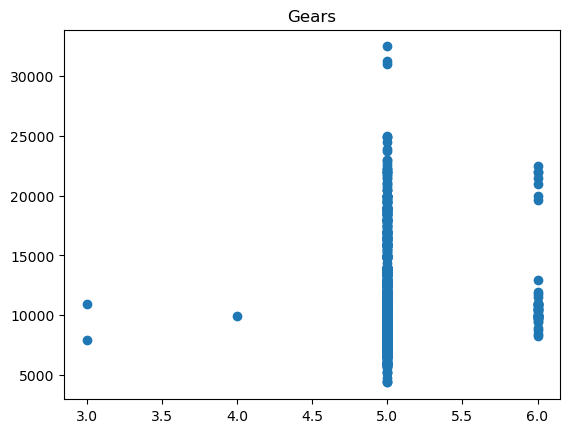

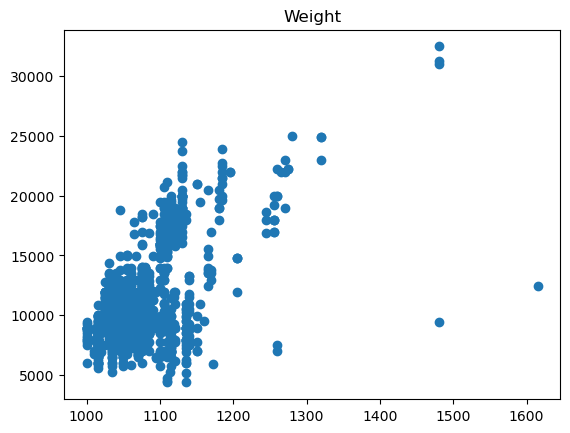

In [204]:
# Scatter Plot for relationship between x and target variable.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'Price']
for cols in num_cols:
    plt.scatter(df1[cols], df1['Price'])
    plt.title(cols)
    plt.show()

In [205]:
# Finding corelation

df1.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [31]:
# Statistical summary.

df1.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [32]:
df1.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [40]:
# Preprocessing the data. (standardization.)

# for numerical variables.
d1 = df1.drop(columns = ['Fuel_Type'], axis = 1)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss_new = ss.fit_transform(d1)
ss_new = pd.DataFrame(ss_new)
ss_new.columns = list(d1)
ss_new.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577


In [66]:
# for categorical variables.
d2 = df1[['Fuel_Type']]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

d2["Fuel_Type"] = le.fit_transform(d2["Fuel_Type"])
d2

C:\Users\ptaru\AppData\Local\Temp\ipykernel_31428\3325085349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2["Fuel_Type"] = le.fit_transform(d2["Fuel_Type"])


,Fuel_Type
0,1
1,1
2,1
3,1
4,1
...,...
1431,2
1432,2
1433,2
1434,2


In [126]:
df2 = pd.concat([ss_new, d2], axis = 1)
df2.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,1


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

# MODEL 1

In [127]:
# Split the data.

X1 = df2.iloc[:, 1:11]
Y1 = df2['Price']

In [138]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 42)

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [139]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x1_train, y1_train)

LinearRegression()

In [140]:
# Coefficients of variables.

print(model.coef_)

[-6.22755639e-01 -1.75131042e-01  8.53284826e-02  1.55111255e-02
 -8.60194727e-03 -9.52939319e-03 -1.11022302e-16  2.75612569e-02
  3.41229295e-01  2.37762660e-01]


In [124]:
X1.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight', 'Fuel_Type'],
      dtype='object')

# Interpretation:

Coefficients got some as Positive and some as Negative values. This shows that Positive Coefficient values has Positive Relationship where as Negative coefficient values has Negative Relationship between x and y variables.
It means that,
1. Age_08_04 variable got Negative coefficient. This tells that if age increaces price will decreases.
2. KM variable got Negative coefficient. This tells that if KM increaces price will decreases.
3. HP variable got Positive coefficient. This tells that if HP increaces price will increases.
4. Automatic variable got Positive coefficient. This tells that if Automatic increaces price will increases.
5. cc variable got Negative coefficient. This tells that if cc increaces price will decreases.
6. Doors variable got Negative coefficient. This tells that if Doors increaces price will decreases.
7. Cylinders variable got Negative coefficient. This tells that if Cylinders increaces price will decreases.
8. Gears variable got Positive coefficient. This tells that if Gears increaces price will increases.
9. Weight variable got Positive coefficient. This tells that if Weight increaces price will increases.


In [141]:
y1_train_pred = model.predict(x1_train)

In [142]:
y1_test_pred = model.predict(x1_test)

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test1 = mean_squared_error(y1_test, np.round(y1_test_pred, 2))
print('Test Mean Squared Error:', mse_test1)

r2_score_train1 = r2_score(y1_train, np.round(y1_train_pred, 2))
print("Train Accuracy Score:", r2_score_train1)
r2_score_test1 = r2_score(y1_test, np.round(y1_test_pred, 2))
print("Test Accuracy Score:", r2_score_test1)

Test Mean Squared Error: 0.1596357170484971
Train Accuracy Score: 0.8695035839939497
Test Accuracy Score: 0.8427221566509883


#  MODEL 2

In [153]:
# Split the data.

X2 = df2.drop(columns = ['Fuel_Type', 'Automatic', 'Gears'], axis = 1)
Y2 = df2['Price']

In [154]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.20, random_state = 42)

In [155]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x2_train, y2_train)

LinearRegression()

In [156]:
y2_train_pred = model.predict(x2_train)
y2_test_pred = model.predict(x2_test)

In [157]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test2 = mean_squared_error(y2_test, np.round(y2_test_pred, 2))
print('Test Mean Squared Error:', mse_test2)

r2_score_train2 = r2_score(y2_train, np.round(y2_train_pred, 2))
print("Train Accuracy Score:", r2_score_train2)
r2_score_test2 = r2_score(y2_test, np.round(y2_test_pred, 2))
print("Test Accuracy Score:", r2_score_test2)

Test Mean Squared Error: 8.570592429112575e-06
Train Accuracy Score: 0.9999914118396032
Test Accuracy Score: 0.9999915559981287


#  MODEL 3

In [158]:
# Split the data.

X3 = df2.drop(columns = ['Fuel_Type', 'Automatic', 'Doors', 'Gears', 'Cylinders'], axis = 1)
Y3 = df2['Price']

In [159]:
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.20, random_state = 42)

In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x3_train, y3_train)

LinearRegression()

In [161]:
y3_train_pred = model.predict(x3_train)
y3_test_pred = model.predict(x3_test)

In [162]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test3 = mean_squared_error(y3_test, np.round(y3_test_pred, 2))
print('Test Mean Squared Error:', mse_test3)

r2_score_train3 = r2_score(y3_train, np.round(y3_train_pred, 2))
print("Train Accuracy Score:", r2_score_train3)
r2_score_test3 = r2_score(y3_test, np.round(y3_test_pred, 2))
print("Test Accuracy Score:", r2_score_test3)

Test Mean Squared Error: 8.570592429112575e-06
Train Accuracy Score: 0.9999914118396032
Test Accuracy Score: 0.9999915559981287


5.Apply Lasso and Ridge methods on the model.

# LASSO

In [180]:
# Split the data.

X_L = df2.drop(columns = ['Fuel_Type', 'Automatic', 'Doors', 'Gears', 'Cylinders'], axis = 1)
Y_L = df2['Price']

In [181]:
from sklearn.model_selection import train_test_split

xl_train, xl_test, yl_train, yl_test = train_test_split(X_L, Y_L, test_size = 0.20, random_state = 42)

In [182]:
from sklearn.linear_model import Lasso

In [183]:
lasso_model = Lasso(alpha = 0.1, random_state = 42)
lasso_model.fit(xl_train, yl_train)

Lasso(alpha=0.1, random_state=42)

In [184]:
yl_pred_train_lasso = lasso_model.predict(xl_train)
yl_pred_test_lasso = lasso_model.predict(xl_test)

In [185]:
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
mse_test_lasso = mean_squared_error(yl_test, yl_pred_test_lasso)
print('Test Mean Squared Error Lasso:', np.round(mse_test_lasso, 2))

r2_score_train = r2_score(yl_train, yl_pred_train_lasso)
print('Train r2 Score Lasso:', np.round(r2_score_train, 2))
r2_score_test = r2_score(yl_test, yl_pred_test_lasso)
print('Test r2 Score Lasso:', np.round(r2_score_test, 2))

Test Mean Squared Error Lasso: 0.01
Train r2 Score Lasso: 0.99
Test r2 Score Lasso: 0.99


# RIDGE

In [193]:
# Split the data.

X_R = df2.drop(columns = ['Fuel_Type', 'Automatic', 'Doors', 'Gears', 'Cylinders'], axis = 1)
Y_R = df2['Price']

In [194]:
from sklearn.model_selection import train_test_split

xr_train, xr_test, yr_train, yr_test = train_test_split(X_R, Y_R, test_size = 0.20, random_state = 42)

In [195]:
from sklearn.linear_model import Ridge

In [196]:
ridge_model = Ridge(alpha = 0.1, random_state = 42)
ridge_model.fit(xr_train, yr_train)

Ridge(alpha=0.1, random_state=42)

In [197]:
yr_pred_train_ridge = ridge_model.predict(xr_train)
yr_pred_test_ridge = ridge_model.predict(xr_test)

In [198]:
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
mse_test_ridge = mean_squared_error(yr_test, yr_pred_test_ridge)
print('Test Mean Squared Error Ridge:', np.round(mse_test_ridge, 2))

r2_score_train = r2_score(yr_train, yr_pred_train_ridge)
print('Train r2 Score Ridge:', np.round(r2_score_train, 2))
r2_score_test = r2_score(yr_test, yr_pred_test_ridge)
print('Test r2 Score Ridge:', np.round(r2_score_test, 2))

Test Mean Squared Error Ridge: 0.0
Train r2 Score Ridge: 1.0
Test r2 Score Ridge: 1.0


# Interview Questions.

1.What is Normalization & Standardization and how is it helpful?

In [ ]:
'''
NORMALIZATION :-
    It is a data preprocessing technique used to rescale numerical features to a common range (usually 0 to 1)

How is it helpful :-
-> Ensures all features contribute equally to the model.
-> It helps the model train faster and perform better.
-> Improves accuracy and training speed for algorithms sensitive to scale.

STANDARDIZATION :-
    It is is the process of transforming features so that they have a mean of 0 and a standard deviation of 1.

How is it helpful :-
-> Puts all features on the same scale, so no variable dominates due to large magnitude.
-> In models like Linear or Logistic Regression, coefficients become more comparable.
-> Reduces numerical issues and improves accuracy for models sensitive to feature scale.
'''